In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('Medicalpremium.csv')
df.head(3)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000


In [3]:
df.shape

(986, 11)

## Exploratory Data Analysis

In [4]:
Number_of_diabetes_patients = (df['Diabetes']==1).sum()
Number_of_diabetes_patients


np.int64(414)

414 patients have diabetes

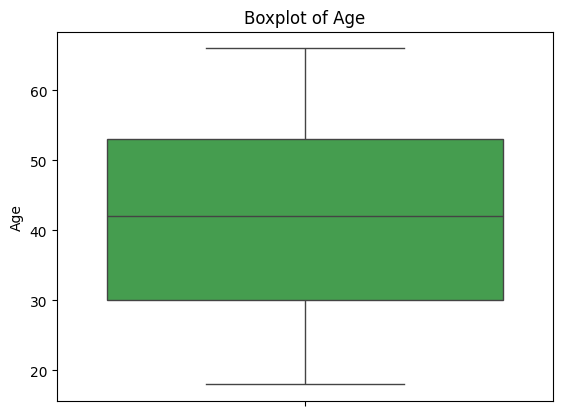

In [5]:
sns.boxplot(y=df['Age'],color='#36ac43')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()


+ The majority of patients are aged between 30 and 54.
+ The median patient is about 42 years old.
+ The age distribution appears fairly symmetric, with no extreme outliers.

### Weight Distribution

In [6]:
Average_weight = df['Weight'].mean()
Average_weight

np.float64(76.95030425963489)

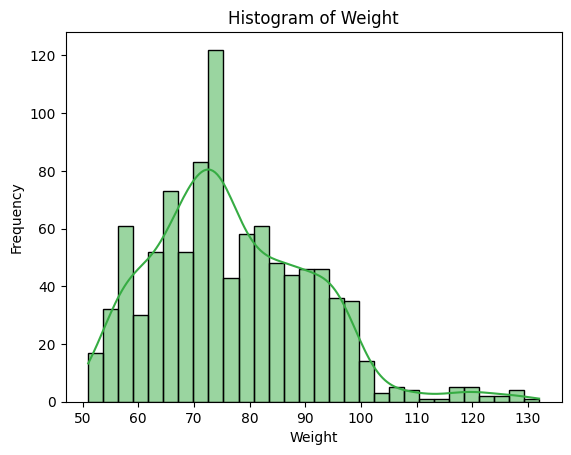

In [7]:
sns.histplot(df['Weight'].dropna(), bins=30,kde=True, color='#36ac43')
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

+ Most patients weigh around 70–75 kg.
+ The dataset includes a few patients with weights over 100 kg, but these are less common.
+ The right skew suggests that higher weights are less frequent but present.

### Correlations

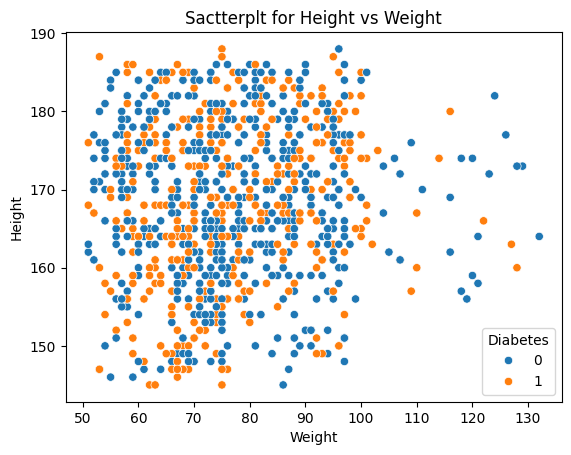

In [8]:
sns.scatterplot(df, x='Weight', y='Height', hue='Diabetes')
plt.title('Sactterplt for Height vs Weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(title='Diabetes')
plt.show()

- There's a wide distribution of weights and heights among individuals.

- People with and without diabetes appear to be spread across similar height and weight ranges, with no obvious visual separation, suggesting diabetes may not be clearly distinguishable by just height and weight.

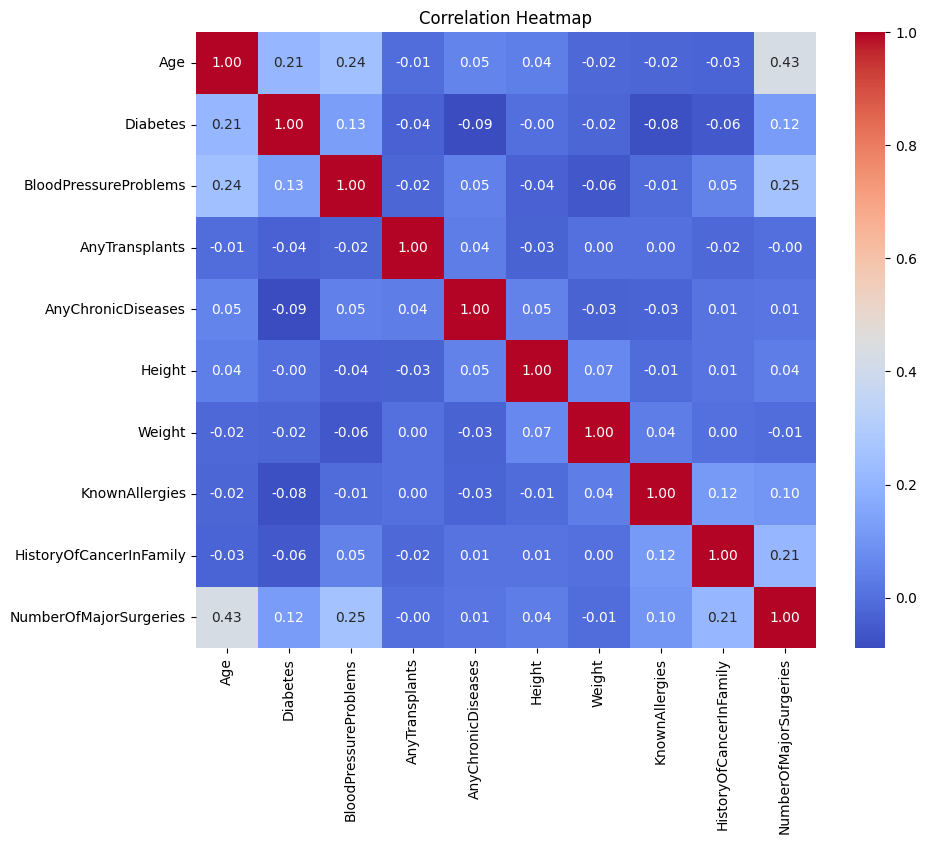

In [9]:
cols=['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
df_subsets=df[cols]
correlation_matrix=df_subsets.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

1) Age has:

- A moderate positive correlation (0.43) with NumberOfMajorSurgeries.

- A weak positive correlation with BloodPressureProblems (0.24) and Diabetes (0.21).

- This makes sense, as older individuals are more likely to have surgeries or chronic health issues.

2) Diabetes shows:

- Weak correlations with all variables.

- Slight positive correlation with BloodPressureProblems (0.13) and Age (0.21).

- Slight negative correlation with AnyChronicDiseases (-0.09), though this is very weak.

3) Most variables are weakly correlated with each other (near 0), indicating low linear dependency.

4) Strongest correlations (besides the diagonal 1.00 values):

- Age & NumberOfMajorSurgeries: 0.43

- BloodPressureProblems & NumberOfMajorSurgeries: 0.25

- HistoryOfCancerInFamily & KnownAllergies: 0.12

- There's no strong linear correlation between diabetes and any single variable in this dataset.

- Age is the most influential variable in terms of its relationship with other health factors.

### Feature Selection

In [10]:
X=df.drop('PremiumPrice', axis=1)
y=df['PremiumPrice']

All other columns are used as features except PremiumPrice column which is a Label.

### Modeling

#### Linear Regression

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R Squared: {r2:.2f}")

RMSE: 3495.95
R Squared: 0.71


### Random Forest Regressor

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print(f"RMSE (Random Forest): {rmse_rf:.2f}")   
print(f"R Squared (Random Forest): {r2_rf:.2f}")

RMSE (Random Forest): 2305.81
R Squared (Random Forest): 0.88


#### XG Boost

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor(n_estimators=100,learning_rate=0.1 ,random_state=42)
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)
mse_xgb=mean_squared_error(y_test,y_pred_xgb)   
rmse_xgb=np.sqrt(mse_xgb)
r2_xgb=r2_score(y_test,y_pred_xgb)  
print(f"RMSE (XGBoost): {rmse_xgb:.2f}")
print(f"R Squared (XGBoost): {r2_xgb:.2f}")

RMSE (XGBoost): 2690.55
R Squared (XGBoost): 0.83


The Random Forest Regressor outperforms the other models, achieving an R² score of 0.88, compared to 0.83 for XGBoost and 0.71 for Linear Regression. This means that the Random Forest model explains 88% of the variance in the target variable (PremiumPrice), making it the most effective and reliable model for predicting insurance premiums based on the available features.

#### Model Deployment

In [14]:
import joblib
joblib.dump(rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']